Decision Tree

In [1]:
from __future__ import division
import graphlab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from scipy import stats
import graphviz
from sklearn import feature_selection

In [2]:
data = graphlab.SFrame('C:\Users\josep\Documents\University of Toronto\Summaries\\fromPythonCurveFitSimilarRowColumnAvgv3145.csv')

This non-commercial license of GraphLab Create for academic use is assigned to joseph.j.ng3698@gmail.com and will expire on May 24, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\josep\AppData\Local\Temp\graphlab_server_1539373317.log.0


Finished parsing file C:\Users\josep\Documents\University of Toronto\Summaries\fromPythonCurveFitSimilarRowColumnAvgv3145.csv

Parsing completed. Parsed 100 lines in 0.172602 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,long,str,str,str,str,str,str,long,str,long,long,long,str,str,long,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,long,float,float,float,float,long,float,float,float,float,long,float,float,float,float,long,float,float,float,float,long,float,float,float,float,long,float,float,float,float,long,float,float,float,float,long,float,float,float,float,long,float,float,float,float,long,float,float,float,float,long,float,float,float,float,long,float,float,float,float,long,float,float,float,float,long,float,float,float,float,long,float,float,float,float,long,float,float,float,float,long,float,float,float,float,long,float,float,float,float,long]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
---------------------------------------

Finished parsing file C:\Users\josep\Documents\University of Toronto\Summaries\fromPythonCurveFitSimilarRowColumnAvgv3145.csv

Parsing completed. Parsed 3145 lines in 0.115687 secs.

In [9]:
data.remove_column('rowNumber')
data.remove_column('Identifier')
data.remove_column('Model')
data.remove_column('UserID')
data.remove_column('Has a Heat Pump')
data.remove_column('filename')
data.remove_column('Number of Remote Sensors')
data.remove_column('Auxiliary Heat Fuel Type')
data.remove_column('Country')
data.remove_column('Province/State')
data.remove_column('fill')


City,Floor Area [ft2],Style,Number of Floors,Age of Home [years],Number of Occupants,2016_01 Adjust
Elgin,3000,Detached,2,10,2,nan
Toronto,4500,Detached,3,45,5,nan
Hopkinsville,3000,Detached,1,55,4,17.0
Pittsburgh,2500,RowHouse,3,120,1,nan
Pittsburgh,2500,RowHouse,3,116,1,nan
Westford,3000,Detached,3,30,3,8.0
Beaverton,3000,Detached,2,5,2,nan
Mount Airy,3000,Detached,3,25,3,0.0
Lincoln,2000,Detached,2,25,3,0.0
Denver,2500,Detached,3,50,3,24.0


In [10]:
# Converting style of home to a categorical variable 
categoricalStyle = data['Style']
categoricalStyle = pd.get_dummies(categoricalStyle)
data = data.to_dataframe()
data = data.merge(categoricalStyle, left_index = True, right_index = True)


In [1253]:
# Pick and choose the time period that we are interested in
#winter = ['2017_01','2017_02','2017_03' ] 
#spring = ['2017_04','2017_05','2017_06','2016_04','2016_05','2016_06' ] 
#summer = ['2017_07','2017_08','2017_09','2016_07','2016_08','2016_09' ] 
#fall = ['2016_10','2016_11','2016_12' ] 
#cities = ['Austin', 'San Diego', 'Nashville','Toronto', 'Chicago', 'Calgary', 'Miami']
#summer = ['2017_07']
#winter = ['2017_01']

# Pick and choose the features that we are interested in

timeOfInterest = winter
climateZone = ['ASHRAE Climate Zone']
modelFeatures = ['Floor Area [ft2]', 'Number of Occupants', 'Number of Floors', 'Age of Home [years]']
houseStyles = ['Apartment','Condominium','Detached','Loft','MultiPlex','RowHouse','SemiDetached','Townhouse']
interestedFeatures = ['Floor Area [ft2]', 'Number of Occupants', 'Number of Floors', 'Age of Home [years]']

# Obtain environmental parameters
indoorRH = []
indoorTemp = []
outdoorRH = []
outdoorTemp = []
adjustments = []

for i in timeOfInterest:
    indoorRH.append(i + ' Indoor RH')
    indoorTemp.append(i + ' Indoor Temp')
    outdoorRH.append(i + ' Outdoor RH')
    outdoorTemp.append(i + ' Outdoor Temp')
    adjustments.append(i + ' Adjust')


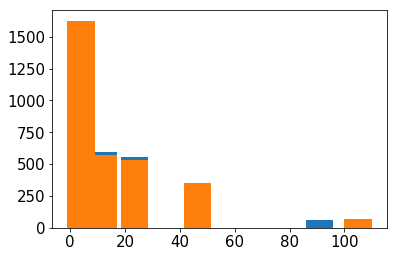

In [1216]:
# Bins are based on [twice per week, every other day, every day, twice per day]
%matplotlib inline
binsWinter = [0,8, 16, 31, 62, data['2017_01 Adjust'].max()]
histWinter, binsWinter = np.histogram(data['2017_01 Adjust'], bins = binsWinter)
widthsWinter = 10
centerWinter = (binsWinter[:-1]+binsWinter[1:])/2 

binsSummer = [0,8, 16, 31, 62, int(data['2017_07 Adjust'].max())]
histSummer, binsSummer = np.histogram(data['2017_07 Adjust'], bins = binsSummer)
widthsSummer = 10
centerSummer = (binsSummer[:-1] + binsSummer[1:])/2

plt.bar(centerWinter, histWinter, align = 'center', width = widthsWinter)
plt.bar(centerSummer, histSummer, align = 'center', width = widthsSummer)
plt.show()

# Choose 1 Function to create a target column

createTargetColumnBinary: Creates 2 classes
<br>
createMultipleTargetColumn: Creates multiple classes based on predefined bins
<br>


In [1254]:
# Creating the target columns
# A house is comfortable if the number of thermostat adjustments for that month is less than the average thermostat adjustments
# for that month
# If the house is uncomfortable for more than half of the months, then the target column = 'Uncomfortable'
def createTargetColumnBinary(data, adjustments):
    dataTargetColumn = data[adjustments]
   
    target = []

    for i in range(0,len(dataTargetColumn)):
        comfortableCounter = 0
        uncomfortableCounter = 0
        dataPoint = dataTargetColumn.iloc[i,:]

        for j in range(0,len(adjustments)):

            if dataPoint[j] <= dataTargetColumn.iloc[:,j].mean():
                comfortableCounter += 1
            
            else:
                uncomfortableCounter += 1
            
        if comfortableCounter > uncomfortableCounter:
            target.append('Comfortable')
        else:
            target.append('Uncomfortable')

    return target

testTarget = createTargetColumnBinary(data, adjustments)


In [1217]:
# Creating target column with multiple classes based on the bins created previously 
def createMultipleTargetColumn(data,adjustments, binsWinter, binsSummer):
    dataTargetColumn = data[adjustments]
    maxAdjustment = dataTargetColumn.max()
    targetSummer = []
    targetWinter = []
    for i in range(0,len(dataTargetColumn)):
        comfortableCounter = 0
        uncomfortableCounter = 0
        dataPoint = dataTargetColumn.iloc[i,:]
        
        for j in range(0,len(adjustments)):
            
            if adjustments[j] == '2017_01 Adjust':
                for k in range(1,len(binsWinter)+1):
                    
                    if dataPoint[j] <= binsWinter[k]:
                        targetWinter.append(k)
                        break
                        
            else:
                for m in range(1,len(binsSummer)+1):
                    if dataPoint[j] <= binsSummer[m]:
                        targetSummer.append(m)
                        break
        
    return targetWinter, targetSummer
                
targetWinter, targetSummer = createMultipleTargetColumn(data,adjustments, binsWinter, binsSummer) 

In [1179]:
def createMultipleTargetColumn3Class(data, adjustments):
    dataTargetColumn = data[adjustments]
   
    target = []

    for i in range(0,len(dataTargetColumn)):
        comfortableCounter = 0
        uncomfortableCounter = 0
        dataPoint = dataTargetColumn.iloc[i,:]

        for j in range(0,len(adjustments)):

            if dataPoint[j] <= dataTargetColumn.iloc[:,j].mean():
                comfortableCounter += 1
            
            else:
                uncomfortableCounter += 1
            
        if comfortableCounter >=3: #uncomfortableCounter: #and comfortableCounter >=4:
            target.append('Comfortable')
        elif uncomfortableCounter >=3: #comfortableCounter: #uncomfortableCounter: #and comfortableCounter <=2:
            target.append('Uncomfortable')
        else:
            target.append('Undecided')

    return target

testTarget = createMultipleTargetColumn3Class(data, adjustments)

In [1255]:
print len([i for i, x in enumerate(testTarget) if x == 'Uncomfortable'])
print len([i for i, x in enumerate(testTarget) if x == 'Comfortable'])
print len([i for i, x in enumerate(testTarget) if x == 'Undecided'])

1045
2100
0


In [1233]:
# creating final target column
target = []
for i in range(0,len(targetWinter)):
    target.append(int((targetWinter[i]+targetSummer[i])/2))

print "Number of data points in each class label"
for j in range(1,len(binsWinter)):
    test= [i for i, x in enumerate(target) if x == j]
    testWinter = [i for i, x in enumerate(targetWinter) if x == j]
    testSummer = [i for i, x in enumerate(targetSummer) if x == j]
    print len(testWinter)
    print len(testSummer)
    print len(test)

Number of data points in each class label
1696
1706
1734
558
533
773
520
514
452
315
328
166
56
64
20


In [1256]:
dataOriginal = pd.DataFrame(data, copy = True)
dataNormalized = pd.DataFrame(data, copy = True)



In [1257]:
# Feature Selection
features =  interestedFeatures + houseStyles + climateZone + indoorTemp + indoorRH + outdoorTemp + outdoorRH
features

['Floor Area [ft2]',
 'Number of Occupants',
 'Number of Floors',
 'Age of Home [years]',
 'Apartment',
 'Condominium',
 'Detached',
 'Loft',
 'MultiPlex',
 'RowHouse',
 'SemiDetached',
 'Townhouse',
 'ASHRAE Climate Zone',
 '2017_01 Indoor Temp',
 '2017_02 Indoor Temp',
 '2017_03 Indoor Temp',
 '2017_01 Indoor RH',
 '2017_02 Indoor RH',
 '2017_03 Indoor RH',
 '2017_01 Outdoor Temp',
 '2017_02 Outdoor Temp',
 '2017_03 Outdoor Temp',
 '2017_01 Outdoor RH',
 '2017_02 Outdoor RH',
 '2017_03 Outdoor RH']

In [1258]:
# Function to normalize the data (scale between 0 and 1)
def normalize(column):
    newColumn = []
    maxValue = max(column)
    minValue = min(column)
    
    for i in range(0,len(column)):
        
        normalizedValue = (column[i] - minValue)/(maxValue - minValue)
        newColumn.append(normalizedValue)

    return newColumn, maxValue, minValue

In [1259]:
# Normalizing the data

combined = features
dataNormalized = dataNormalized.reset_index(drop = True)
dataUnnormalized = pd.DataFrame(dataNormalized, copy= True) # creating a copy of the original with the same index
dataToNormalize = dataNormalized[combined]

maxVals = []
minVals = []
minMaxdf = pd.DataFrame({'Value': ['Min', 'Max']})

for i in list(dataToNormalize.columns.values):
    dataColumn = dataToNormalize[i]
    normalizedColumn, maxValue, minValue = normalize(dataColumn)
    dataToNormalize[i] = normalizedColumn
    maxVals.append(maxValue)
    minVals.append(minValue)
    minMaxdf[i] = [minValue, maxValue]
dataNormalized.update(dataToNormalize)


C:\Users\josep\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [1260]:
x = dataNormalized[features]
y = testTarget

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 0)

In [1262]:
# Hyperparameter tuning using GridSearchCV

def GridSearch(parameters,x_train, y_train):
    shuffle = KFold(n_splits = 10, shuffle = True, random_state = 0)
    clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, cv = shuffle, scoring = 'f1_weighted')
    clf.fit(x_train,y_train)
    optimalParam =  clf.best_params_
    print clf.cv_results_.get('std_test_score').mean()
    print clf.cv_results_.get('mean_test_score')
    print clf.cv_results_.get('mean_test_score').mean()
    print clf.best_score_
    return optimalParam

In [1263]:
# Hyperparameter tuning using GridSearchCV

clf = tree.DecisionTreeClassifier(max_depth = i)

optimalDepth, accuracy, maxDepthArray, minScoreArray, maxScoreArray = findMaxDepth(clf, x_train, y_train, 10)
print "Optimal depth from cross_val_score: " + str(optimalDepth)

# Finding the optimal depth using GridSearch CV
optimalParam = GridSearch({'max_depth':range(3,20),
                                  'criterion': ['gini', 'entropy']}, x_train, y_train)

optimalDepthGSCV = optimalParam.get('max_depth')
optimalCriterion = optimalParam.get('criterion')
optimalClassWeight = optimalParam.get('class_weight')
print "Optimal depth from GridSearchCV: " + str(optimalDepthGSCV) 
print "Optimal criterion from GridSearchCV: " + str(optimalCriterion)
print "optimal class weight from GridSearchCV: " + str(optimalClassWeight)

Optimal depth from cross_val_score: 3
0.0315908123754
[ 0.55706689  0.56564179  0.57156879  0.57501204  0.57730808  0.58659734
  0.5903096   0.59155104  0.57958712  0.59601267  0.59146525  0.59089503
  0.60190031  0.59368718  0.59918152  0.59687067  0.59655667  0.55211244
  0.55411821  0.55452269  0.55727489  0.56423146  0.5699832   0.57035133
  0.56932169  0.57280041  0.57930304  0.57702124  0.58856203  0.58669648
  0.57912038  0.5797654   0.58266518  0.58709245]
0.579004544795
0.601900307138
Optimal depth from GridSearchCV: 15
Optimal criterion from GridSearchCV: gini
optimal class weight from GridSearchCV: None


In [1267]:
# Fitting the model with the tuned hyperparameters

model = tree.DecisionTreeClassifier(class_weight = None, criterion = optimalCriterion, random_state = 0,
                                    max_depth = optimalDepthGSCV, splitter = 'best').fit(x_train,y_train)

#model = tree.DecisionTreeClassifier(class_weight = None, criterion = optimalCriterion, random_state = 0,
                                    #max_depth = None, splitter = 'best').fit(x_train,y_train)
# exporting into graphviz
#dot_data = tree.export_graphviz(model, out_file = None, feature_names = features, class_names = y_train, filled = True, rounded = True,
                               #special_characters = True)
#graph = graphviz.Source(dot_data)
#graph

# Exporting into pdf using pydot
#graph = pydot.graph_from_dot_data(dotfile.getvalue())
#graph[0].write_pdf("summer.pdf")
#colors = ('turquoise', 'orange')


#graph.write_png('summer.png')

In [1268]:
# Obtaining predictions
prediction = model.predict(x_test)
probs = model.predict_proba(x_test)

In [1269]:
# Obtain score metrics
print "Test Set Accuracy: " + str(accuracy_score(y_test, prediction, normalize = True))
print "Training Set Accuracy: " + str(model.score(x_train, y_train))
print "Test Set Accuracy using score: " + str(model.score(x_test, y_test))
print f1_score(y_test,prediction, average = None )
f1_score(y_test, prediction, average = 'weighted', labels = ['Comfortable', 'Uncomfortable'])



Test Set Accuracy: 0.596825396825
Training Set Accuracy: 0.866784452297
Test Set Accuracy using score: 0.596825396825
[ 0.7196468   0.28248588]


0.57392649131340356

In [1270]:
importance = [x for x in model.feature_importances_]
featureImportance = {'Feature': features, 'Importance': importance}
summary = pd.DataFrame(data = featureImportance)
summarySorted = summary.sort_values(by = ['Importance'], ascending = False)
summarySorted

,Feature,Importance
23,2017_02 Outdoor RH,0.096215
24,2017_03 Outdoor RH,0.089976
13,2017_01 Indoor Temp,0.083393
17,2017_02 Indoor RH,0.078259
16,2017_01 Indoor RH,0.075327
22,2017_01 Outdoor RH,0.066397
21,2017_03 Outdoor Temp,0.065516
19,2017_01 Outdoor Temp,0.064655
15,2017_03 Indoor Temp,0.060929
14,2017_02 Indoor Temp,0.060647


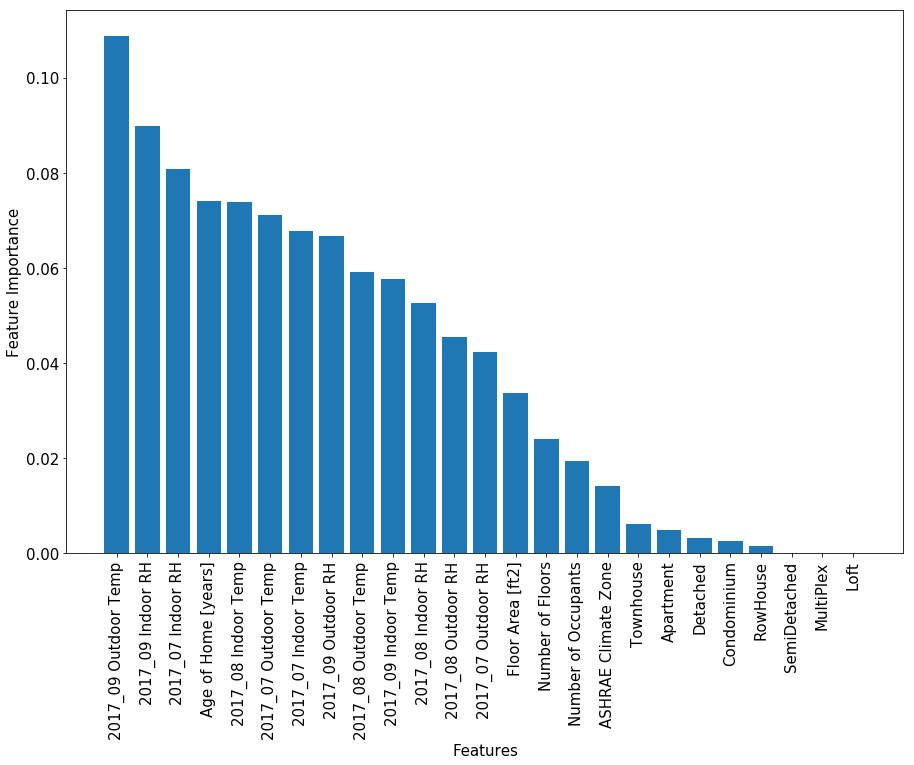

In [1194]:
# Plot feature importances ranking
plt.figure(figsize = (15,10))
plt.bar(range(0,len(summarySorted)), summarySorted['Importance'], align = 'center')
plt.xticks(range(0,len(summarySorted)), summarySorted['Feature'], rotation = 90)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.rc('xtick', labelsize = 15)
plt.rc('xtick', labelsize = 15)
plt.rc('axes', labelsize = 15)
plt.show()

In [302]:
# Function to un-normalize data

def unnormalize(column, minValue, maxValue):
    newColumn = []
    
    for i in range(0,len(column)):
        
        originalValue = column.iloc[i] * (maxValue - minValue) + minValue
        newColumn.append(originalValue)

    return newColumn

In [1252]:
# Rows = actual, columns = prediction
confusion_matrix(y_test,prediction, labels = ['Comfortable', 'Undecided', 'Uncomfortable'])

array([[176,   0,  40],
       [  0,   0,   0],
       [ 72,   0,  27]], dtype=int64)

1.0

# Code that is not longer used

In [ ]:
#removes all columns with indoor temperature and indoor relative humidity
columnIndoorTemp = []
columnIndoorRH = []
columnOutdoorRH = []
columnOutdoorTemp = []
yearMonth = []
for i in range(2016,2018):
    for j in range(4,13): #Need to adjust this value depending on which columns have been deleted
        if i == 2017 and j == 10:
            break

        if j < 10:
            columnIndoorTemp.append(str(i) + '_' + '0' + str(j) + ' Indoor Temp')
            columnIndoorRH.append(str(i) + '_' + '0' + str(j) + ' Indoor RH')
            columnOutdoorRH.append(str(i) + '_' + '0' + str(j) + ' Outdoor RH')
            columnOutdoorTemp.append(str(i) + '_' + '0' + str(j) + ' Outdoor Temp')
            yearMonth.append(str(i) + '_' + '0' + str(j))
        else: 
            columnIndoorTemp.append(str(i) + '_' + str(j) + ' Indoor Temp')
            columnIndoorRH.append(str(i) + '_' + str(j) + ' Indoor RH')
            columnOutdoorRH.append(str(i) + '_' + str(j) + ' Outdoor RH')
            columnOutdoorTemp.append(str(i) + '_' + str(j) + ' Outdoor Temp')
            yearMonth.append(str(i) + '_' + str(j))

        #data = data.drop(columnIndoorTemp,1)
        #data = data.drop(columnIndoorRH,1)
        #data = data.drop(columnOutdoorRH,1)
        #data = data.drop(columnOutdoorTemp,1)


In [ ]:
# Create histogram of adjustments
# Failed first attempt at binning the data
#numBins = 6
#histWinter,binsWinter = np.histogram(data['2017_01 Adjust'], bins = numBins)
#widthsWinter = 0.7*(binsWinter[1] - binsWinter[0])
#centerWinter = (binsWinter[:-1]+binsWinter[1:])/2

#histSummer, binsSummer = np.histogram(data['2017_07 Adjust'], numBins)
#widthsSummer = 0.7*(binsSummer[1] - binsSummer[0])
#centerSummer = (binsSummer[:-1] + binsSummer[1:])/2

#plt.bar(centerWinter, histWinter, align = 'center', width = widthsWinter)
#plt.bar(centerSummer, histSummer, align = 'center', width = widthsSummer)

#plt.show()
#print binsWinter
#print binsSummer

In [ ]:
# Plotting cross validation score vs the max depth of the tree
%matplotlib inline
plt.plot(range(3,20),[t for t in maxDepthArray])
plt.plot(range(3,20),[p for p in minScoreArray])
plt.plot(range(3,20),[s for s in maxScoreArray])
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('CV Accuracy')


In [ ]:
# Using SelectKBest to see the scores of the features

selector = feature_selection.SelectKBest(feature_selection.f_classif, k = 'all')
selector.fit_transform(x,y)
test = pd.DataFrame({'Features': features, 'Scores': selector.scores_,
                     'P-Value': selector.pvalues_})
test = test.sort_values('Scores', ascending = False)

# Using RFECV to select the best features
shuffle = KFold(n_splits = 10, shuffle = True, random_state = 0)
selectorRFECV = RFECV(clf, step = 1, cv = shuffle, scoring = 'accuracy')
selectorRFECV.fit(x_train,y_train)
RFECVdf = pd.DataFrame({'Features': features, 'RFECV Rank': selectorRFECV.ranking_,
                       'SelectKBest Scores': selector.scores_,
                       'SelectKBest PVal': selector.pvalues_})
RFECVdf = RFECVdf.sort_values('RFECV Rank', ascending = True)

# Creating a RFECV Rankings for plotting 
maxRank = max(RFECVdf['RFECV Rank'])
rankPlot = []
for i in range(0,len(RFECVdf)):
    rankPlotTransfer = maxRank - RFECVdf['RFECV Rank'].iloc[i] + 1
    rankPlot.append(rankPlotTransfer)

RFECVdf['RFECV Rank Plot'] = rankPlot


# Plot RFECV feature importances ranking
plt.figure(figsize = (15,10))
plt.bar(range(0,len(RFECVdf)), RFECVdf['RFECV Rank Plot'], align = 'center')
plt.xticks(range(0,len(RFECVdf)), RFECVdf['Features'], rotation = 90)
plt.xlabel("Features")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.ylabel("Feature Rank")
plt.show()

# Plot number of features vs. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (# of correct classifications)")
plt.plot(range(1,len(selectorRFECV.grid_scores_)+1), selectorRFECV.grid_scores_)
plt.show()

In [ ]:
# Determine the optimal features to include in the model 
# t-test alpha parameter
alpha = [0.05,0.1]


featuresCopy = interestedFeatures + houseStyles   + outdoorTemp + climateZone+indoorTemp + indoorRH+ outdoorRH #Change this according to the features you are interested in
#featuresCopy = interestedFeatures + houseStyles + cities 
meanScore = []
featuresToRemove = []
xOriginal = x_train[features]
shuffle = KFold(n_splits = 10, shuffle = True, random_state = 0)
scoreOriginal = cross_val_score(clf,xOriginal,y_train,cv = shuffle,scoring = 'accuracy')

for i in range(0,len(interestedFeatures)):
    check = featuresCopy.pop(0)
    
    xCheck = x_train[featuresCopy]
    meanScore = cross_val_score(clf, xCheck,y_train,cv=shuffle,scoring = 'accuracy')
    featuresCopy.append(check)
    
    
    pvalue = stats.ttest_rel(scoreOriginal,meanScore)
    pvalue = pvalue[1]
    print "Removed Feature: " + check
    print "Score with Feature Removed"
    print meanScore
    print "Std: " + str(np.std(meanScore))
    print "Average: " + str(meanScore.mean())
    print "Original Score"
    print scoreOriginal
    print "Std: " + str(np.std(scoreOriginal))
    print "Average: " + str(scoreOriginal.mean())
    print "T-test P Value: " + str(pvalue)
    
    for i in alpha:
        if pvalue < i and meanScore.mean() > scoreOriginal.mean():
            featuresToRemove.append(check)
            print "Statistically significant improvement at signifiance " + str(i)
    print "===================="
    print ""
print featuresToRemove

In [ ]:
# Determining the significance of other features
#Check features that can be removed

featuresCopy =  interestedFeatures +  climateZone + indoorTemp + indoorRH +outdoorTemp + outdoorRH

featuresToRemove = []
xOriginal = x_train[features]
xCheck = x_train[featuresCopy]


#shuffle = KFold(n_splits = 10, shuffle = True, random_state = 0)

featureRemovedScore = cross_val_score(clf,xCheck,y_train,cv=shuffle,scoring = 'accuracy')

ttest = stats.ttest_rel(scoreOriginal,featureRemovedScore)
pvalue = ttest[1]
tstat = ttest[0]

for i in alpha:
    if pvalue < i and featureRemovedScore.mean() > scoreOriginal.mean():

        print "Remove Feature!"
        print "T-test P Value at signifiance " + str(i) +": "  + str(pvalue)
        print "T statistic: " + str(tstat)
    else:
        print "Keep Feature"
        print "T-test P Value at signifiance " + str(i) +": "  + str(pvalue)
        print "T statistic: " + str(tstat)

print ""
print "Original Score"
print scoreOriginal
print "std: " + str(np.std(scoreOriginal))
print "avg: " +str(scoreOriginal.mean())
print ""
print "Feature Removed Score"
print featureRemovedScore
print "std: " + str(np.std(featureRemovedScore))
print "avg: " + str(featureRemovedScore.mean())
print ""


In [ ]:
# Creating a function that uses 10 fold cross validation to find the optimal max depth of the decision tree

def findMaxDepth(classifier, x, y, numFolds):
    
    maxDepthArray = []
    minScoreArray = []
    maxScoreArray = []
    maxDepthRange = range(3,20)
    for i in maxDepthRange:
        clf = tree.DecisionTreeClassifier(max_depth = i)

        scores = cross_val_score(estimator = clf, X = x, y = y, cv = numFolds, scoring = 'f1_weighted')
        maxDepthArray.append(scores.mean())
        minScoreArray.append(min(scores))
        maxScoreArray.append(max(scores))
    maxIndex = maxDepthArray.index(max(maxDepthArray)) 
    optimalDepth = maxIndex + maxDepthRange[0]
    return optimalDepth, max(maxDepthArray), maxDepthArray, minScoreArray, maxScoreArray